# Emotion Classification Model Based on Face Expressions

#### Imports :

In [3]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

#### Data Distribution :

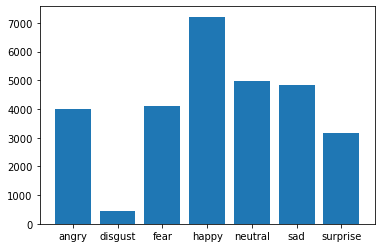

In [5]:
training_dir = "../dataset/train"
testing_dir = "../dataset/test"
categories = os.listdir(training_dir)
categories_values = []
for c in categories:
    c_train_dir = os.path.join(training_dir,c)
    c_test_dir =  os.path.join(testing_dir,c)
    categories_values.append(len(os.listdir(c_train_dir)))

plt.bar(x=categories, height=categories_values)
plt.show()

    

#### Prepare Data :

#### Building model :

In [6]:
def create_model(input_shape):
    model = models.Sequential()
    # convolutional layers
    model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    #dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    return model 

#### Training Model :

In [7]:
model = create_model((150,150,1))